In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import torch
a = torch.randn(2, 3).to_sparse().requires_grad_(True)
print(a)
#a.values = torch.ones_like(a.values())
values = torch.ones(a._nnz())
#len(a.values)
a.indices()
sparse_tensor = torch.sparse_coo_tensor(a.indices(), torch.ones(a._nnz()), a.size(), requires_grad=True)
sparse_tensor

tensor(indices=tensor([[0, 0, 0, 1, 1, 1],
                       [0, 1, 2, 0, 1, 2]]),
       values=tensor([-0.2948,  0.3300,  1.6334, -1.0311,  0.4621, -1.1239]),
       size=(2, 3), nnz=6, layout=torch.sparse_coo, requires_grad=True)


tensor(indices=tensor([[0, 0, 0, 1, 1, 1],
                       [0, 1, 2, 0, 1, 2]]),
       values=tensor([1., 1., 1., 1., 1., 1.]),
       size=(2, 3), nnz=6, layout=torch.sparse_coo, requires_grad=True)

In [2]:
# Read in the data
#df = pd.read_csv('results/Relations_Important_all.csv', sep=',')
df = pd.read_csv('/Users/macoftraopia/Documents/GitHub/RGCN-Explainer/RGCN_stuff/Relation_Importance_aifb/Relations_Important_all_aifb_1.csv', sep=',')
df.set_index('node_idx', inplace=True)
df['tot'] = df.sum(axis=1)
gb = df.groupby('label')    
#gb.get_group(0)
df

,label,abstract,address,author,booktitle,carriedOutBy,carriesOut,chapter,dealtWithIn,edition,...,worksAtProject,year,type.1,type.2,range,subClassOf,allValuesFrom,inverseOf,onProperty,tot
node_idx,,,,,,,,,,,,,,,,,,,,,
5678,0,NaN,NaN,4.0,NaN,1.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
5724,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0
5699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5688,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5702,0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
5714,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
5708,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5843,0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
5873,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [5]:
#Get the relative importance of each relation for each class (divided by the total importance score of the class)


for i in np.unique(df['label']):
    exec(f'group_{i} = gb.get_group(i)')
    exec(f'group_rel_{i} = group_{i}.iloc[:,1:].div(group_{i}.tot, axis=0)')
    exec(f'group_rel_{i} = group_rel_{i}.drop(columns=["tot"])')
    exec(f'group_max_{i} = group_rel_{i}.idxmax(axis=1)')

#group_rel_0
print('group_max_0: \n', group_max_0.value_counts(),
      '\n group_max_1 \n', group_max_1.value_counts(),#,
         '\n group_max_2 \n', group_max_2.value_counts(),
         '\n group_max_3 \n', group_max_3.value_counts())


group_max_0: 
 fax            7
author         5
isAbout        1
dealtWithIn    1
dtype: int64 
 group_max_1 
 isAbout    2
author     2
dtype: int64 
 group_max_2 
 author        6
isAbout       3
hasProject    2
dtype: int64 
 group_max_3 
 isAbout        3
author         1
publication    1
fax            1
dtype: int64


In [6]:
group_max_0#.dropna(axis=1, how='all')


node_idx
5678         author
5724         author
5699            fax
5688            fax
5702         author
5714            fax
5708            fax
5843        isAbout
5873            fax
5697            fax
5783         author
5701            fax
5845    dealtWithIn
5778         author
dtype: object

In [7]:
df_rel = df.iloc[:,1:].div(df.tot, axis=0)
df_rel['label'] = df['label']

df_rel.dropna(axis=1, how='all')


,author,carriedOutBy,carriesOut,dealtWithIn,editor,fax,hasProject,homepage,isAbout,isWorkedOnBy,...,photo,projectInfo,publication,publishes,type,worksAtProject,type.1,type.2,tot,label
node_idx,,,,,,,,,,,,,,,,,,,,,
5678,0.153846,0.038462,NaN,0.153846,NaN,0.038462,0.076923,NaN,0.115385,0.153846,...,0.038462,NaN,0.076923,0.115385,NaN,NaN,NaN,NaN,1.0,0
5724,0.142857,NaN,NaN,NaN,NaN,0.142857,NaN,0.142857,NaN,NaN,...,NaN,NaN,NaN,NaN,0.142857,NaN,0.142857,0.142857,1.0,0
5699,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5688,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5702,0.250000,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5714,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5708,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5843,0.166667,NaN,NaN,0.041667,NaN,0.041667,0.083333,0.041667,0.250000,0.125000,...,NaN,0.041667,0.083333,NaN,NaN,0.041667,NaN,NaN,1.0,0
5873,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN,NaN,NaN,...,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [8]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['author'].count(), mean=X['author'].mean(), std=X['author'].std())
# output

,label,n,mean,std
0,0,7,0.210050,0.078821
1,1,4,0.157213,0.017053
2,2,11,0.187979,0.124650
3,3,4,0.144533,0.020931


In [10]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['dealtWithIn'].count(), mean=X['dealtWithIn'].mean(), std=X['dealtWithIn'].std())
# output

,label,n,mean,std
0,0,3,0.134136,0.08436
1,1,1,0.035714,NaN
2,2,5,0.028083,0.01793
3,3,1,0.062500,NaN


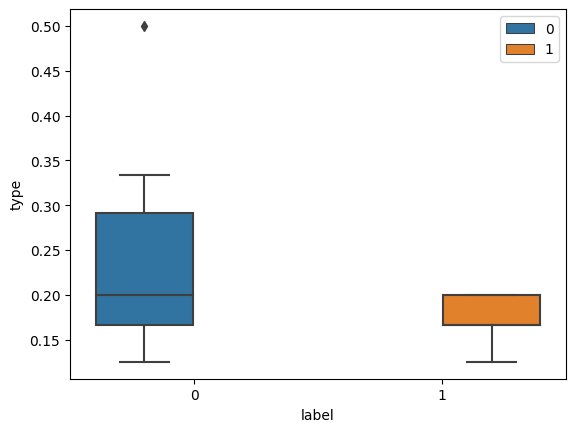

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df_rel, x="label", y="type",  hue=df.label.tolist())
#sns.boxplot(data=df_rel, x="plant_var", y="canopy_vol", hue=df.plant_var..tolist(), ax=axs[1])
plt.show()

In [82]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('author + fax ~ label', data=df)
print(fit.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 2.0000 23.0000 -7398770816394397.0000 1.0000
         Pillai's trace                1.0000 2.0000 23.0000 -7398770816394398.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 2.0000 23.0000 -7398770816394397.0000 1.0000
    Roy's greatest root -643371375338643.2500 2.0000 23.0000 -7398770816394397.0000 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

In [85]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(group_rel_0['author'], group_rel_1['author'])
print(fvalue, pvalue)

nan nan
